In [1]:
import pandas as pd

df = pd.read_csv('Vacc_Data.csv')

df.head()

,_id,date,age_group,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma
0,1,2021-03-01T00:00:00,0-4yrs,0.0,0.0,0.00
1,2,2021-03-01T00:00:00,5-11yrs,0.0,0.0,0.00
2,3,2021-03-01T00:00:00,12-17yrs,0.0,0.0,0.00
3,4,2021-03-01T00:00:00,18-39yrs,0.0,0.0,0.00
4,5,2021-03-01T00:00:00,40-59yrs,0.0,0.0,0.02


In [6]:
df = df[['date', 'age_group', 'deaths_boost_vac_rate_7ma', 'deaths_full_vac_rate_7ma', 'deaths_not_full_vac_rate_7ma']]
df['date'] = pd.to_datetime(df['date'])
df_filtered = df[df['age_group'] == '40-59yrs']
df.head()

,date,age_group,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma
0,2021-03-01,0-4yrs,0.0,0.0,0.00
1,2021-03-01,5-11yrs,0.0,0.0,0.00
2,2021-03-01,12-17yrs,0.0,0.0,0.00
3,2021-03-01,18-39yrs,0.0,0.0,0.00
4,2021-03-01,40-59yrs,0.0,0.0,0.02


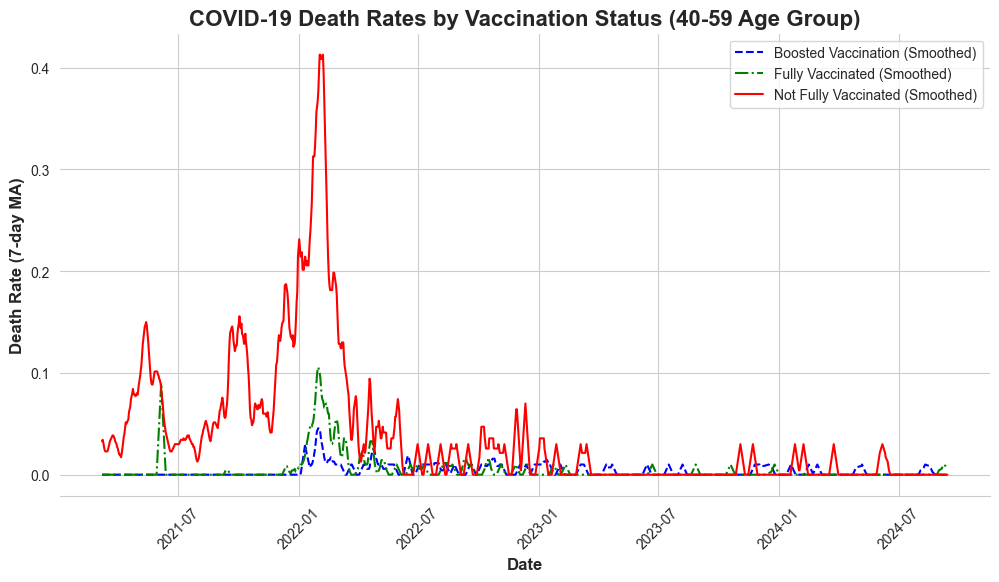

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("muted")

plt.figure(figsize=(12,6))

# copy df_filtered
df_filtered = df_filtered.copy()

# Setup data, apply rolling avg for smoothening
df_filtered.loc[:, 'deaths_boost_vac_rate_7ma_smooth'] = df_filtered['deaths_boost_vac_rate_7ma'].rolling(window=7).mean()
df_filtered.loc[:, 'deaths_full_vac_rate_7ma_smooth'] = df_filtered['deaths_full_vac_rate_7ma'].rolling(window=7).mean()
df_filtered.loc[:, 'deaths_not_full_vac_rate_7ma_smooth'] = df_filtered['deaths_not_full_vac_rate_7ma'].rolling(window=7).mean()

sns.lineplot(data=df_filtered, x='date', y='deaths_boost_vac_rate_7ma_smooth', label='Boosted Vaccination (Smoothed)', linestyle='--', color='blue')
sns.lineplot(data=df_filtered, x='date', y='deaths_full_vac_rate_7ma_smooth', label='Fully Vaccinated (Smoothed)', linestyle='-.', color='green')
sns.lineplot(data=df_filtered, x='date', y='deaths_not_full_vac_rate_7ma_smooth', label='Not Fully Vaccinated (Smoothed)', linestyle='-', color='red')

# Labels
plt.title('COVID-19 Death Rates by Vaccination Status (40-59 Age Group)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Death Rate (7-day MA)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

plt.legend()

plt.grid(True)
sns.despine(left=True)

plt.savefig('covid_deaths_by_vaccination_status.png', dpi=300, bbox_inches='tight')
plt.show()
